In [21]:
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [8]:
(train_image, train_lables),(test_image, test_lables) = mnist.load_data()

In [10]:
print(train_image.shape)
print(train_lables.shape)

(60000, 28, 28)
(60000,)


In [12]:
train_image = train_image.reshape((60000,28,28,1))
train_image = train_image.astype('float32') / 255

test_image = test_image.reshape((10000,28,28,1))
test_image = test_image.astype('float32') / 255

train_lables = to_categorical(train_lables)
test_lables = to_categorical(test_lables)

(28, 28, 1)


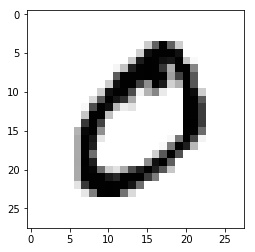

In [28]:
print(train_image[0].shape)
im = train_image[1].reshape((28,28))
# print(train_image)
plt.imshow(im, cmap=plt.cm.binary)
plt.show()

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [13]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_image, train_lables, epochs=5, batch_size=64)


Epoch 1/5
60000/60000 [==============================] - 42s 705us/step - loss: 0.9423 - acc: 0.6885
Epoch 2/5
60000/60000 [==============================] - 40s 673us/step - loss: 0.2585 - acc: 0.9201
Epoch 3/5
60000/60000 [==============================] - 41s 681us/step - loss: 0.1315 - acc: 0.9589
Epoch 4/5
60000/60000 [==============================] - 41s 680us/step - loss: 0.0914 - acc: 0.9714
Epoch 5/5
60000/60000 [==============================] - 42s 692us/step - loss: 0.0731 - acc: 0.9771


In [14]:
test_loss , test_acc = model.evaluate(test_image, test_lables)

10000/10000 [==============================] - 3s 254us/step


In [29]:
print(test_loss,test_acc)

0.05405533086317591 0.9827


In [36]:
acc = history.history['acc']
loss = history.history['loss']
epoch = range(1, len(loss)+1)


In [38]:
print(len(epoch))
print(acc)
print(loss)

5
[0.68845, 0.9201, 0.95895, 0.9714333333333334, 0.9770833333333333]
[0.9423229447841645, 0.2585125396748384, 0.1315146431863308, 0.09144278870622317, 0.07314968522687754]


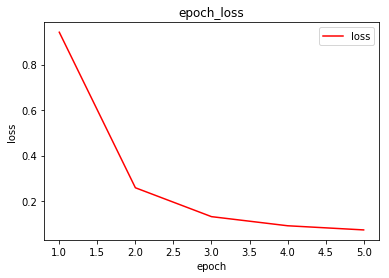

In [47]:
plt.plot(epoch, loss,'r',label='loss')
plt.title('epoch_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

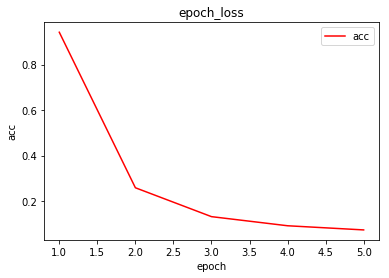

In [48]:
plt.plot(epoch, loss, 'r', label='acc')
plt.title('epoch_loss')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.show()

In [53]:
prediction = model.predict(test_image)

In [57]:
print(len(prediction))
print(prediction[0])
l=[]
for i in range(len(prediction[0])):
    l.append(i)


10000
[1.20169705e-08 1.34640681e-08 6.53508778e-06 6.15028985e-05
 1.35563110e-13 3.31606849e-08 1.61136735e-19 9.99931455e-01
 1.15280706e-07 3.12052947e-07]


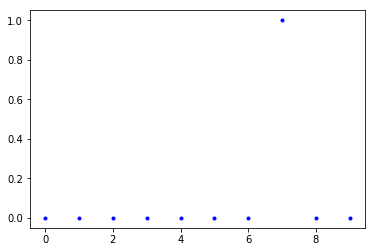

In [62]:
plt.plot(l, prediction[0],'b.',label='predic')
plt.show()